In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
# load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# normalization
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# encode one-hot
num_classes = 10
y_train_full = to_categorical(y_train_full, num_classes)
y_test = to_categorical(y_test, num_classes)

# split validation set
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


x_train shape: (40000, 32, 32, 3)
x_train min: 0.0, x_train max: 1.0
Data augmentation applied successfully!
x_batch shape: (9, 32, 32, 3)
x_batch min: 8.134434028761461e-05, x_batch max: 1.0
Enhanced image min: 0.1064228042960167, max: 0.9326279759407043


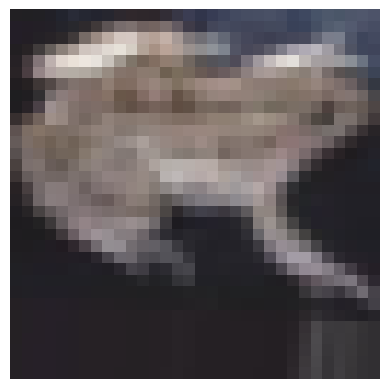

x_batch min: 0.0, x_batch max: 0.9948397874832153


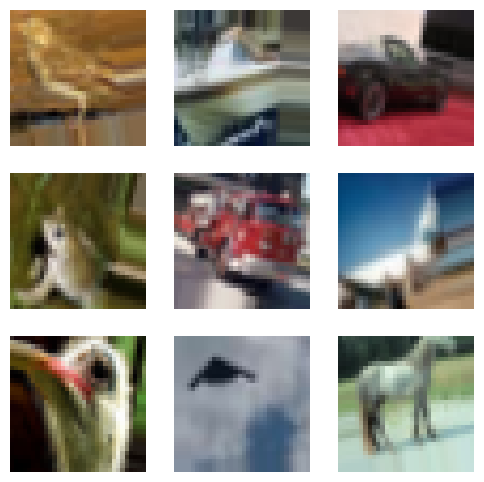

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_train min: {x_train.min()}, x_train max: {x_train.max()}")

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)
datagen.fit(x_train)


# validate fit
print("Data augmentation applied successfully!")

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    print(f"x_batch shape: {x_batch.shape}")
    print(f"x_batch min: {x_batch.min()}, x_batch max: {x_batch.max()}")
    break


# pick one picture from dataset
sample_image = x_train[0]

# augment this image
sample_gen = datagen.flow(np.expand_dims(sample_image, axis=0), batch_size=1)

# print the range of the image
for batch in sample_gen:
    print(f"Enhanced image min: {batch.min()}, max: {batch.max()}")
    plt.imshow(batch[0])
    plt.axis('off')
    plt.show()
    break

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    print(f"x_batch min: {x_batch.min()}, x_batch max: {x_batch.max()}")
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.clip(x_batch[i], 0, 1))
        plt.axis('off')
    plt.show()
    break


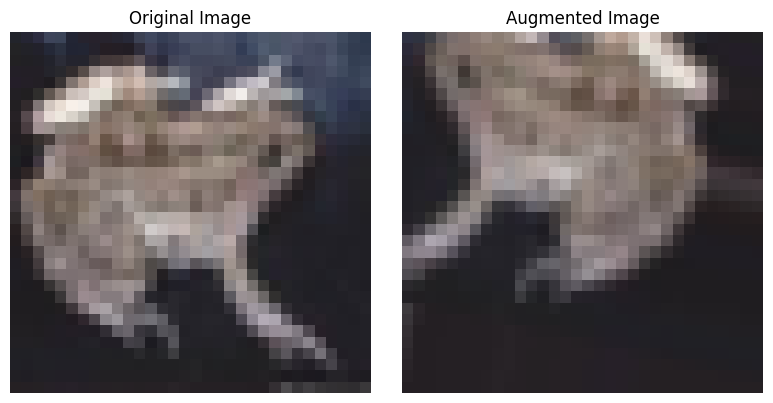

In [ ]:
# pick first image from train dataset
sample_image = x_train[0]

# show origin image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

# augment image
sample_gen = datagen.flow(np.expand_dims(sample_image, axis=0), batch_size=1)
augmented_image = next(sample_gen)[0]

# show augmented image
plt.subplot(1, 2, 2)
plt.imshow(np.clip(augmented_image, 0, 1))
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │              

 Total params: 5,880,394 (22.43 MB)

 Trainable params: 5,875,530 (22.41 MB)

 Non-trainable params: 4,864 (19.00 KB)

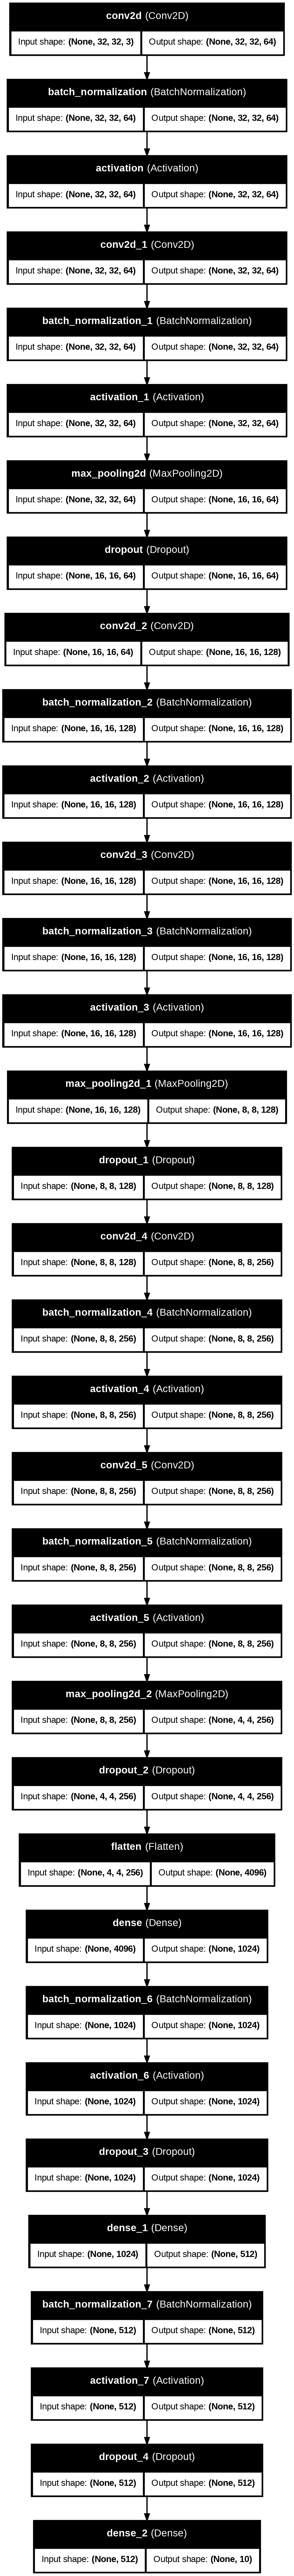

In [ ]:
# define CNN model
model = Sequential()

# first convolution layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# second convolution layer
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# third convolution layer
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# fully connected layer
model.add(Flatten())
model.add(Dense(1024, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# visualize model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [ ]:
# adjust optimizer and learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# set callback function
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[lr_scheduler, early_stopping]
)

# test model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.2303 - loss: 5.2207 - val_accuracy: 0.3333 - val_loss: 4.3527 - learning_rate: 0.0100
Epoch 2/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.3793 - loss: 4.1018 - val_accuracy: 0.3798 - val_loss: 3.8502 - learning_rate: 0.0100
Epoch 3/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.4549 - loss: 3.4317 - val_accuracy: 0.5150 - val_loss: 3.0367 - learning_rate: 0.0100
Epoch 4/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.4992 - loss: 2.9453 - val_accuracy: 0.4312 - val_loss: 3.1911 - learning_rate: 0.0100
Epoch 5/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5481 - loss: 2.5582 - val_accuracy: 0.5797 - val_loss: 2.3575 - learning_rate: 0.0100
Epoch 6/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5799 - loss: 2.2703 - val_accuracy: 0.5361 - val_loss: 2.3498 - learning_rate: 0.0100
Epoch 7/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6071 - loss: 

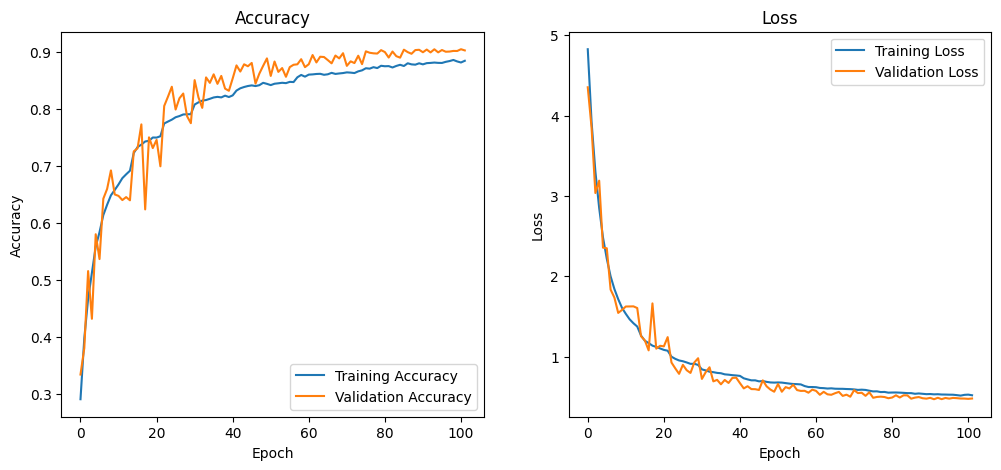

In [ ]:
# plot train curve
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)